##Customer shopping trends Dataset

### By Niharika Madhadi

This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

The features are :-

Customer ID - Unique identifier for each customer

Age - Age of the customer

Gender - Gender of the customer (Male/Female)

Item Purchased - The item purchased by the customer

Category - Category of the item purchased

Purchase Amount (USD) - The amount of the purchase in USD

Location - Location where the purchase was made

Size - Size of the purchased item

Color - Color of the purchased item

Season - Season during which the purchase was made

Review Rating - Rating given by the customer for the purchased item

Subscription Status - Indicates if the customer has a subscription (Yes/No)

Shipping Type - Type of shipping chosen by the customer

Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction

Payment Method - Customer's most preferred payment method

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

The dataset is taken from Kaggle. Reference - https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

## Data Prep

In [1]:
import pandas as pd

shopping_dataset=pd.read_csv('/shopping_trends.csv')

shopping_dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
print(shopping_dataset.shape)
print(shopping_dataset.info())

(3900, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 1

In [3]:
constant_features = [
    feat for feat in shopping_dataset.columns if len(shopping_dataset[feat].unique()) == 1
]

constant_features

[]

In [4]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in shopping_dataset.columns.sort_values():
    if (len(shopping_dataset[val].unique()) < 3):
        val_counts = shopping_dataset[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

No     0.57
Yes    0.43
Name: Discount Applied, dtype: float64
Male      0.68
Female    0.32
Name: Gender, dtype: float64
No     0.57
Yes    0.43
Name: Promo Code Used, dtype: float64
No     0.73
Yes    0.27
Name: Subscription Status, dtype: float64
quasi_consts []


In [5]:
# duplicate rows
shopping_dataset[shopping_dataset.duplicated(keep=False)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


In [6]:

# check of duplicate columns
duplicated_feat = []
for i in range(0, len(shopping_dataset.columns)):
    orig = shopping_dataset.columns[i]

    for dupe in shopping_dataset.columns[i + 1:]:
        if shopping_dataset[orig].equals(shopping_dataset[dupe]):
            duplicated_feat.append(dupe)

duplicated_feat

['Promo Code Used']

In [7]:
#drop duplicate column

shopping_dataset.drop('Promo Code Used',axis=1,inplace=True)

In [8]:
shopping_dataset.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                shopping_dataset.drop(['Review Rating'], axis=1),
                                shopping_dataset['Review Rating'],
                                test_size=0.25,
                                random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(2925, 17)
(975, 17)
      Customer ID  Age Gender Item Purchased     Category  \
1084         1085   34   Male        T-shirt     Clothing   
1859         1860   54   Male           Belt  Accessories   
965           966   43   Male          Boots     Footwear   
2456         2457   59   Male          Jeans     Clothing   
528           529   34   Male       Sneakers     Footwear   

      Purchase Amount (USD)    Location Size   Color  Season  \
1084                     36    Arkansas    S  Purple    Fall   
1859                     26  New Jersey    L   Beige  Summer   
965                      55    Delaware    L   Black  Spring   
2456                     83    Nebraska    M   Green  Winter   
528                      88    Maryland    S   Beige  Winter   

     Subscription Status Payment Method   Shipping Type Discount Applied  \
1084                  No    Credit Card    Next Day Air              Yes   
1859                  No    Credit Card    Store Pickup               No   

In [10]:
X_train.describe()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases
count,2925.000000,2925.000000,2925.000000,2925.000000
mean,1974.888547,44.131282,60.125812,25.396923
std,1121.338463,15.211185,23.739838,14.520213
min,2.000000,18.000000,20.000000,1.000000
25%,996.000000,31.000000,39.000000,13.000000
50%,1993.000000,44.000000,60.000000,25.000000
75%,2948.000000,57.000000,81.000000,38.000000
max,3897.000000,70.000000,100.000000,50.000000


In [11]:
X_train.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Preferred Payment Method,Frequency of Purchases
count,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925
unique,2,25,4,50,4,25,4,2,6,6,2,6,7
top,Male,Jewelry,Clothing,Illinois,M,Teal,Spring,No,Credit Card,Free Shipping,No,PayPal,Every 3 Months
freq,1955,136,1301,75,1333,134,755,2155,515,510,1696,517,446


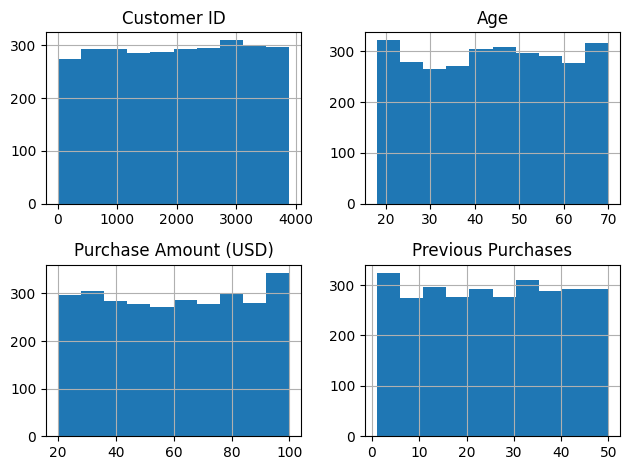

In [12]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

In [13]:
for feat in X_train._get_numeric_data().columns:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    if lower_count > 0 or upper_count > 0:
        print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')
    else:
      print('No outliers are present in data')

No outliers are present in data
No outliers are present in data
No outliers are present in data
No outliers are present in data


### Summary of Data Prep

I have loaded the dataset and got the shape,info() and head() for it. Then I have checked for constants and quasi constants but there are none of them in dataset.There are no duplicated rows as well. Got one duplicated column Promo Code Used ,so dropped it. Checked for null values, there are no null values in dataset. By train test split got the training and testing dataset.Numerical features are plotted in histogram. Also found the outliers and there are none in dataset.

## EDA

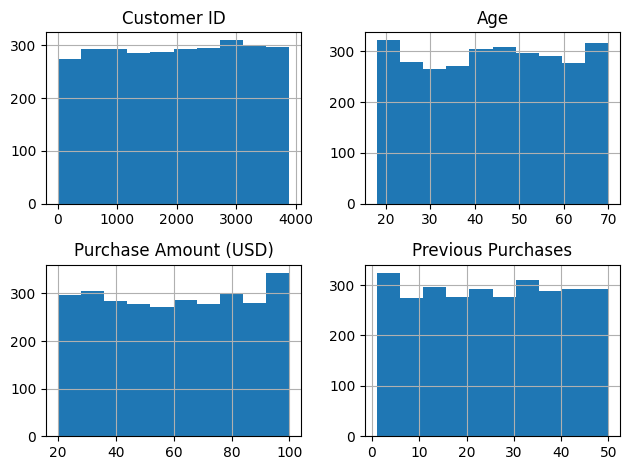

In [14]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

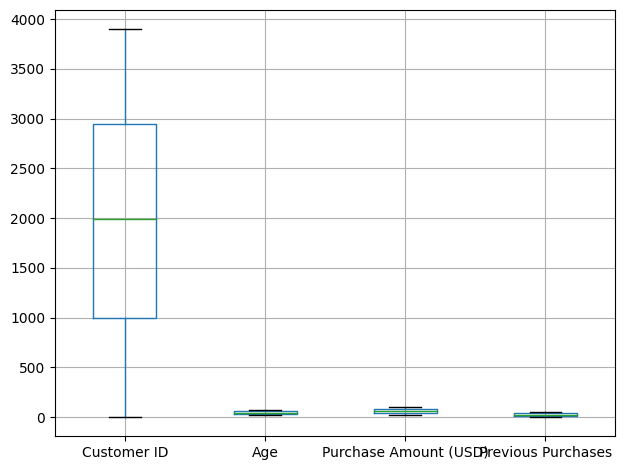

In [15]:
X_train.boxplot()
plt.tight_layout();

Five different graphs are plotted below

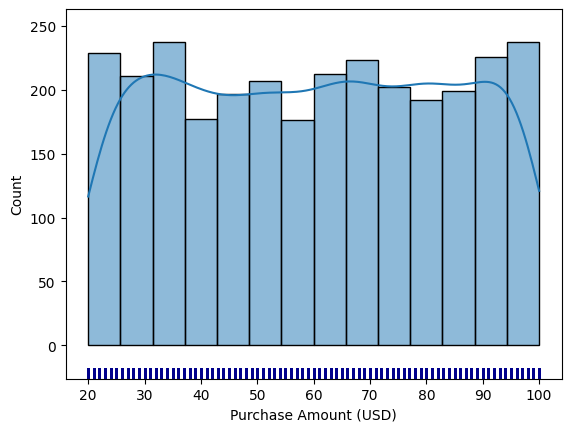

In [16]:
import seaborn as sns
sns.rugplot(x='Purchase Amount (USD)', data=X_train, height=.03, color='darkblue')
sns.histplot(x='Purchase Amount (USD)', data=X_train, kde=True);

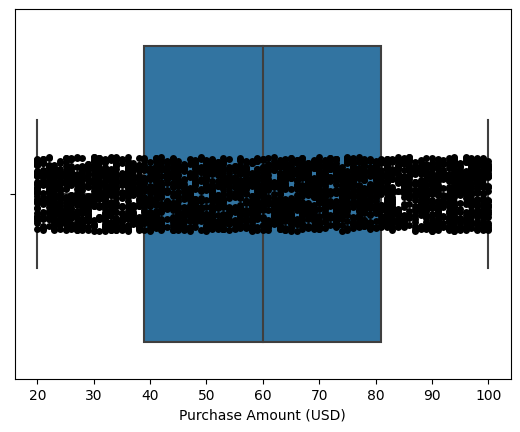

In [17]:
ax = sns.stripplot(x=X_train['Purchase Amount (USD)'], dodge=True, color='black')
sns.boxplot(data=X_train, x='Purchase Amount (USD)', ax=ax);

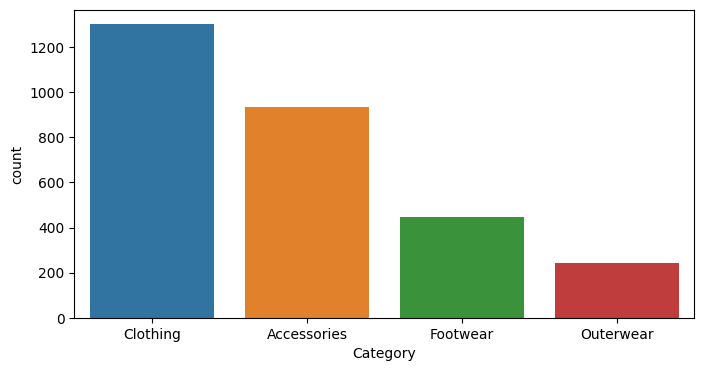

In [18]:
# look at  counts
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=X_train.Category, order=X_train.Category.value_counts().index);

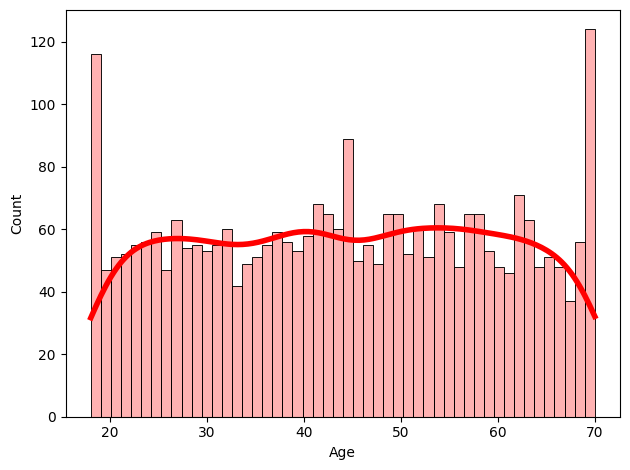

In [19]:
# example of a histogram with kde
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X_train['Age'], alpha=0.3, kde=True,
             bins=int(50), color = 'red',
             line_kws={'linewidth': 4})

plt.tight_layout()
plt.show();

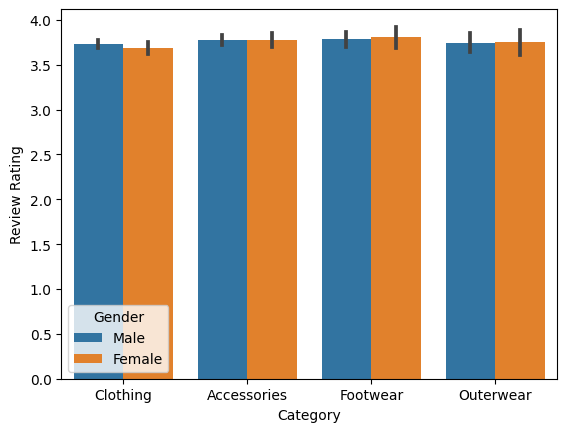

In [20]:
sns.barplot(x='Category', y=y_train, hue='Gender', data=X_train);

Five Group by statements are given below:

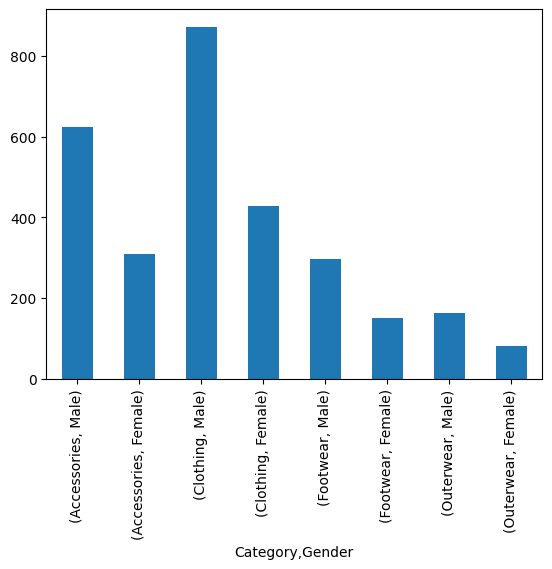

In [21]:
# example of using groupby
X_train.groupby('Category')['Gender'].value_counts().plot(kind='bar');

In [22]:
# groupby data views
shopping_dataset.groupby(['Category', 'Size']).size()

Category     Size
Accessories  L       307
             M       562
             S       230
             XL      141
Clothing     L       481
             M       778
             S       284
             XL      194
Footwear     L       172
             M       267
             S        93
             XL       67
Outerwear    L        93
             M       148
             S        56
             XL       27
dtype: int64

In [23]:
# using aggregates
shopping_dataset.groupby('Gender')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Gender,,,,
Female,20,100,60.249199,60.0
Male,20,100,59.536199,60.0


In [24]:
# using aggregates
shopping_dataset.groupby('Category')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Category,,,,
Accessories,20,100,59.838710,60.0
Clothing,20,100,60.025331,60.0
Footwear,20,100,60.255426,60.0
Outerwear,20,100,57.172840,54.5


In [25]:
for column in X_train.select_dtypes(include='object'):
    if X_train[column].nunique() < 10:
        display(X_train.groupby(column).mean())

<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Gender,,,,
Female,3266.394845,43.860825,60.489691,24.736082
Male,1334.090026,44.265473,59.945269,25.724808


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Category,,,,
Accessories,1981.413719,44.138264,60.049303,25.712755
Clothing,1978.221368,43.831668,60.453497,25.221368
Footwear,1968.944072,44.928412,60.512304,25.507830
Outerwear,1943.057377,44.241803,57.963115,24.922131


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Size,,,,
L,1958.834615,45.135897,59.184615,25.557692
M,2003.501125,43.881470,60.018755,25.407352
S,1907.355691,43.876016,61.221545,25.123984
XL,1998.662500,43.115625,61.181250,25.381250


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Season,,,,
Fall,2033.929775,44.178371,62.088483,24.959270
Spring,1958.921854,44.695364,59.182781,25.115232
Summer,1940.324930,44.088235,58.522409,25.182073
Winter,1967.759409,43.555108,60.743280,26.307796


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Subscription Status,,,,
No,2488.435267,44.034803,60.077494,25.288631
Yes,537.624675,44.401299,60.261039,25.700000


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Payment Method,,,,
Bank Transfer,2009.886598,43.294845,58.463918,26.037113
Cash,1904.854251,44.848178,59.465587,25.149798
Credit Card,1998.434951,44.697087,62.009709,24.528155
Debit Card,1933.321353,43.167019,59.350951,25.281184
PayPal,2025.059322,44.042373,59.510593,25.512712
Venmo,1977.927984,44.662551,61.810700,25.930041


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Shipping Type,,,,
2-Day Shipping,2017.250000,43.959746,60.536017,26.122881
Express,1974.051335,44.638604,60.887064,25.369610
Free Shipping,2043.401961,44.105882,60.662745,24.680392
Next Day Air,1945.413793,43.323276,58.788793,25.030172
Standard,1963.255446,45.300990,58.900990,26.512871
Store Pickup,1903.065708,43.373717,60.948665,24.663244


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Discount Applied,,,,
No,2793.685731,44.137382,60.291274,25.362618
Yes,844.961758,44.122864,59.897478,25.444264


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Preferred Payment Method,,,,
Bank Transfer,2009.680171,43.554371,60.449893,24.622601
Cash,1991.683071,43.990157,59.905512,25.206693
Credit Card,1993.235417,45.756250,61.389583,25.681250
Debit Card,1875.180294,43.840671,61.444444,25.633124
PayPal,1992.019342,43.963250,58.980658,25.560928
Venmo,1985.540084,43.683544,58.683544,25.662447


<ipython-input-25-94d810493ff7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Frequency of Purchases,,,,
Annually,2017.014184,44.042553,61.118203,24.801418
Bi-Weekly,2006.404651,43.400000,60.909302,24.995349
Every 3 Months,1959.746637,43.643498,60.659193,24.560538
Fortnightly,1944.264563,43.798544,59.565534,25.888350
Monthly,1991.022500,44.760000,59.795000,24.937500
Quarterly,1977.406863,45.198529,59.495098,27.487745
Weekly,1926.903941,44.179803,59.204433,25.214286


Two tables are shown as below :

In [26]:
pd.crosstab(X_train['Category'], X_train['Season'])

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,227,232,243,231
Clothing,316,338,301,346
Footwear,103,123,112,109
Outerwear,66,62,58,58


<Axes: xlabel='Season', ylabel='Category'>

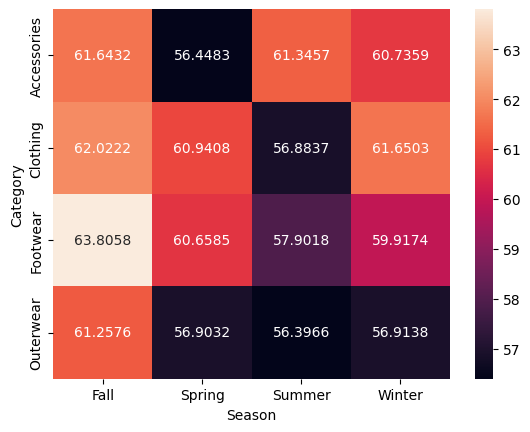

In [27]:
import numpy as np
import seaborn as sns

result_crosstab = pd.crosstab(index = X_train['Category'],
                              columns=X_train['Season'],
                              values =X_train['Purchase Amount (USD)'],
                              aggfunc=np.mean)

sns.heatmap(result_crosstab, annot = True, fmt = 'g')

In [28]:
pd.pivot_table(X_train,
               index=['Payment Method'],
               columns=['Shipping Type'],
               aggfunc='size',
               fill_value=0)

Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Payment Method,,,,,,
Bank Transfer,78,88,72,75,96,76
Cash,84,73,96,67,83,91
Credit Card,68,89,101,70,87,100
Debit Card,75,85,77,78,83,75
PayPal,79,69,85,93,71,75
Venmo,88,83,79,81,85,70


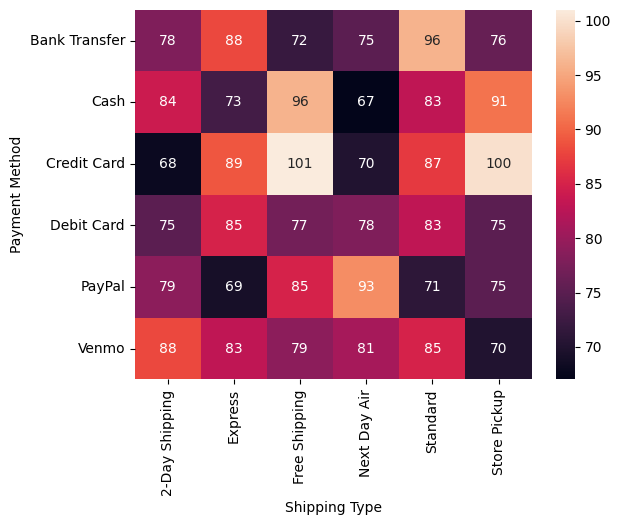

In [29]:
result_pivot = pd.pivot_table(X_train,
                              index=['Payment Method'],
                              columns=['Shipping Type'],
                              aggfunc='size',
                              fill_value=0)

sns.heatmap(result_pivot, annot = True, fmt = 'g');

In [30]:
X_train.corr(method='pearson')

<ipython-input-30-2bc08f89bf1c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr(method='pearson')


,Customer ID,Age,Purchase Amount (USD),Previous Purchases
Customer ID,1.000000,-0.007170,0.000969,-0.021302
Age,-0.007170,1.000000,-0.016873,0.039859
Purchase Amount (USD),0.000969,-0.016873,1.000000,-0.001029
Previous Purchases,-0.021302,0.039859,-0.001029,1.000000


<ipython-input-31-5e586f9f1c7d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr(method='pearson')


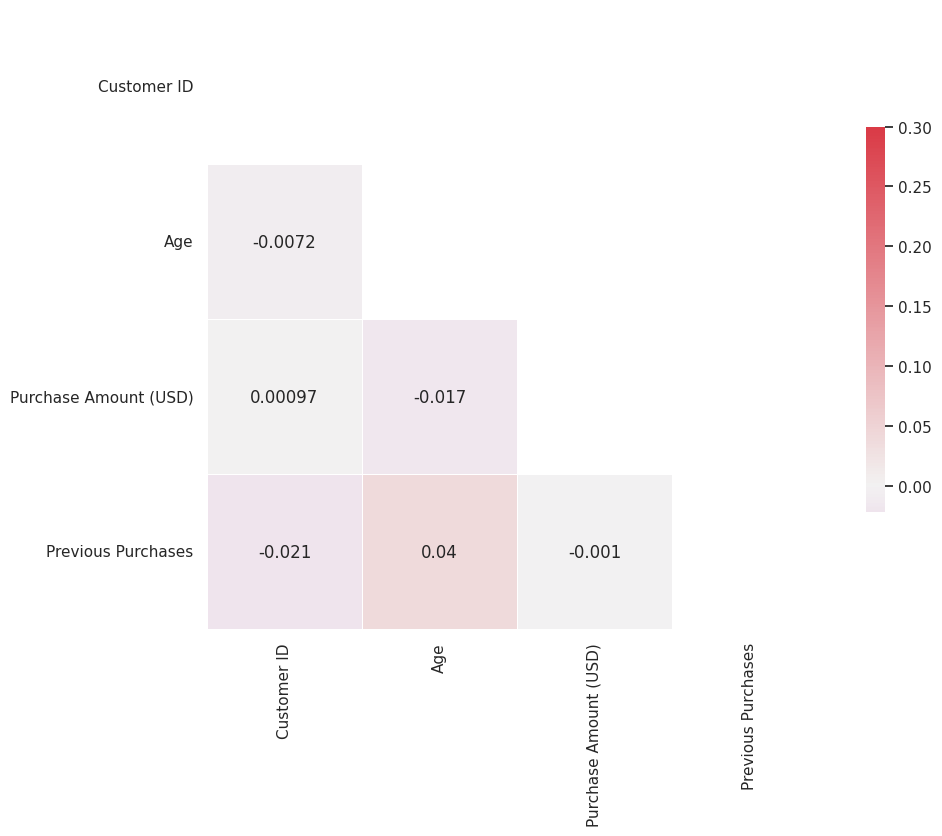

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(320, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

In [32]:
# vif
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_train = X_train._get_numeric_data()
vif_data = [variance_inflation_factor(vif_train.values, i) for i in range(len(vif_train.columns))]

d = {'feature': vif_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,Customer ID,3.491907
1,Age,5.867728
2,Purchase Amount (USD),5.177614
3,Previous Purchases,3.551882


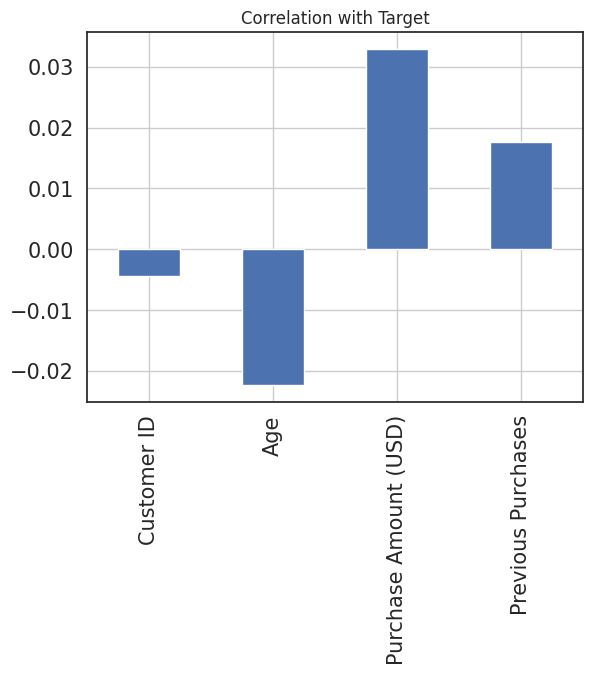

In [33]:
# correlation anlaysis against our titanic target (survived)
X_train._get_numeric_data().corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 90, grid = True);

### Summary of EDA

I have plotted five different graphs to visualize few features in the dataset. I have used five groupby statements to view data differently. Also got pivot and crosstab tables. Then to check multicollinearity i have plotted heatmap and dropped few columns that have high multicollinearity. Got the VIF for all features after multicollinearity is removed. Then got graph of correlation with target and could see that Purchase Amount(USD) has highest collinearity with target.

## Feature Engneering

Bi-label Mapping

In [34]:
# identify features with bi labels
bi_labels = []
for feat in X_train.columns.sort_values():
    if (len(X_train[feat].dropna().unique()) < 3):
        print(X_train[feat].value_counts())
        bi_labels.append(feat)

No     1696
Yes    1229
Name: Discount Applied, dtype: int64
Male      1955
Female     970
Name: Gender, dtype: int64
No     2155
Yes     770
Name: Subscription Status, dtype: int64


In [35]:
# bi-label mapping

for feat in bi_labels:
    print(X_train[feat].value_counts())
    bi0 = X_train[feat].value_counts().index[0]
    bi1 = X_train[feat].value_counts().index[1]
    X_train[feat] = X_train[feat].map({bi0:0,bi1:1})
    X_test[feat] = X_test[feat].map({bi0:0,bi1:1})

X_train.head()

No     1696
Yes    1229
Name: Discount Applied, dtype: int64
Male      1955
Female     970
Name: Gender, dtype: int64
No     2155
Yes     770
Name: Subscription Status, dtype: int64


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1084,1085,34,0,T-shirt,Clothing,36,Arkansas,S,Purple,Fall,0,Credit Card,Next Day Air,1,48,Cash,Quarterly
1859,1860,54,0,Belt,Accessories,26,New Jersey,L,Beige,Summer,0,Credit Card,Store Pickup,0,29,Debit Card,Fortnightly
965,966,43,0,Boots,Footwear,55,Delaware,L,Black,Spring,1,Debit Card,Store Pickup,1,10,Credit Card,Annually
2456,2457,59,0,Jeans,Clothing,83,Nebraska,M,Green,Winter,0,Credit Card,2-Day Shipping,0,5,PayPal,Monthly
528,529,34,0,Sneakers,Footwear,88,Maryland,S,Beige,Winter,1,Venmo,Express,1,40,Cash,Annually


Frequency Encoding

In [36]:
# review categorical features with multiple labels
freq_feats = []
for feat in X_train.select_dtypes(include=['object']).columns.sort_values():
    # print(feat, len(X_train[feat].dropna().unique()))
    if (len(X_train[feat].dropna().unique()) > 5):
        freq_feats.append(feat)

print(freq_feats)

['Color', 'Frequency of Purchases', 'Item Purchased', 'Location', 'Payment Method', 'Preferred Payment Method', 'Shipping Type']


In [37]:
# identify features with more than 5 features and use frequency encoding
for feat in freq_feats:
    freq = X_train.groupby(feat).size()/len(X_train)
    # X_train.loc[:, feat] = X_train[feat].map(freq)
    X_train[feat + '_freq'] = X_train[feat].map(freq)
    freq = X_test.groupby(feat).size()/len(X_test)
    # X_test.loc[:, feat] = X_test[feat].map(freq)
    X_test[feat + '_freq'] = X_test[feat].map(freq)

# print(X_train.head())
X_train.drop(freq_feats, axis=1, inplace=True)
X_test.drop(freq_feats, axis=1, inplace=True)
print(X_train.head())

      Customer ID  Age  Gender     Category  Purchase Amount (USD) Size  \
1084         1085   34       0     Clothing                     36    S   
1859         1860   54       0  Accessories                     26    L   
965           966   43       0     Footwear                     55    L   
2456         2457   59       0     Clothing                     83    M   
528           529   34       0     Footwear                     88    S   

      Season  Subscription Status  Discount Applied  Previous Purchases  \
1084    Fall                    0                 1                  48   
1859  Summer                    0                 0                  29   
965   Spring                    1                 1                  10   
2456  Winter                    0                 0                   5   
528   Winter                    1                 1                  40   

      Color_freq  Frequency of Purchases_freq  Item Purchased_freq  \
1084    0.039316            

One Hot Encoding

In [38]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

cat_features = ['Category', 'Size','Season']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 1084 to 3174
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    2925 non-null   int64  
 1   Age                            2925 non-null   int64  
 2   Gender                         2925 non-null   int64  
 3   Purchase Amount (USD)          2925 non-null   int64  
 4   Subscription Status            2925 non-null   int64  
 5   Discount Applied               2925 non-null   int64  
 6   Previous Purchases             2925 non-null   int64  
 7   Color_freq                     2925 non-null   float64
 8   Frequency of Purchases_freq    2925 non-null   float64
 9   Item Purchased_freq            2925 non-null   float64
 10  Location_freq                  2925 non-null   float64
 11  Payment Method_freq            2925 non-null   float64
 12  Preferred Payment Method_freq  2925 non-null 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Feature Selection

Variance Threshold

In [39]:
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.2)
selections.fit(X_train)
vt_keepers = X_train.columns.values[selections.get_support()]
print(vt_keepers)

['Customer ID' 'Age' 'Gender' 'Purchase Amount (USD)' 'Discount Applied'
 'Previous Purchases' 'Category_Clothing' 'Size_M']


Select From Model

In [40]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# Create a linear regression model as the estimator
estimator = LinearRegression()

# Fit the SelectFromModel with the estimator
selections = SelectFromModel(estimator).fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selections.get_support()]
print(selected_features)


Index(['Color_freq', 'Frequency of Purchases_freq', 'Item Purchased_freq',
       'Location_freq', 'Payment Method_freq', 'Shipping Type_freq'],
      dtype='object')


Recursive feature elimination

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model as the estimator
estimator = LinearRegression()

# Fit the RFE with the estimator
selections = RFE(estimator, n_features_to_select=5).fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selections.support_]
print(selected_features)


Index(['Color_freq', 'Frequency of Purchases_freq', 'Item Purchased_freq',
       'Payment Method_freq', 'Shipping Type_freq'],
      dtype='object')


### Summary of feature engineering and feature selection

I have done three types of encoding,
Bi-label Mapping (used with variables that have only 2 unique labels)

Frequency Encoding (used with variables that have 5 of more unique labels)

One Hot Encoding (used with variables that have 3 or 4 unique labels)

And by 4 different methods performed the feature selection. They are :

Variance Threshold

Select From Model

Recursive feature elimination and

Ridge Regularization


## Model

In [42]:
# sklearn linear regression with mse and R-squared

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train._get_numeric_data(), y_train)
# lr_feat_coeffs = list(zip(X_train._get_numeric_data(), lr_model.coef_))
feats = ['const']
feats.extend(X_train._get_numeric_data().columns)
coefs = [lr_model.intercept_]
coefs.extend(lr_model.coef_)
d = {'Feature': feats, 'Coef': coefs}
lr_df = pd.DataFrame(d)
print(lr_df)

# test set prediction results
yhat = lr_model.predict(X_test._get_numeric_data())
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

                          Feature      Coef
0                           const  3.628381
1                     Customer ID -0.000033
2                             Age -0.001138
3                          Gender  0.009444
4           Purchase Amount (USD)  0.000941
5             Subscription Status -0.017203
6                Discount Applied -0.059692
7              Previous Purchases  0.000793
8                      Color_freq  4.215921
9     Frequency of Purchases_freq -0.797802
10            Item Purchased_freq  1.583835
11                  Location_freq -0.740950
12            Payment Method_freq -1.717602
13  Preferred Payment Method_freq  0.172394
14             Shipping Type_freq  2.291575
15              Category_Clothing -0.061014
16              Category_Footwear  0.019699
17             Category_Outerwear -0.026780
18                         Size_M -0.069037
19                         Size_S  0.032988
20                        Size_XL  0.028754
21                  Season_Sprin

In [43]:

import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_with_const = X_train._get_numeric_data().copy()
X_with_const.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Review Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.275
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.171
Time:                        02:06:25   Log-Likelihood:                -3135.9
No. Observations:                2925   AIC:                             6320.
Df Residuals:                    2901   BIC:                             6463.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Ridge Regularization

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


alpha = 1.0  # You can adjust this parameter
ridge_model = Ridge(alpha=alpha)

ridge_feats=X_train.columns
# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

d = {'Feature': ridge_feats, 'Coef': ridge_model.coef_}
ridge_df = pd.DataFrame(d)
print(ridge_df)
print()


Mean Squared Error: 0.5393855529138951
                          Feature      Coef
0                     Customer ID -0.000033
1                             Age -0.001129
2                          Gender  0.011397
3           Purchase Amount (USD)  0.000943
4             Subscription Status -0.015631
5                Discount Applied -0.060426
6              Previous Purchases  0.000850
7                      Color_freq  0.114592
8     Frequency of Purchases_freq -0.056568
9             Item Purchased_freq  0.038835
10                  Location_freq -0.020940
11            Payment Method_freq -0.110853
12  Preferred Payment Method_freq  0.022223
13             Shipping Type_freq  0.187658
14              Category_Clothing -0.058921
15              Category_Footwear  0.020062
16             Category_Outerwear -0.022081
17                         Size_M -0.070016
18                         Size_S  0.032590
19                        Size_XL  0.027481
20                  Season_Spring  0.

In [45]:
# compare the coefficients from the linear regression and ridge models

d = {'Original': X_train.columns, 'Original Coeffs': lr_model.coef_.tolist(), 'Ridge': ridge_feats, 'Ridge Coeffs': ridge_model.coef_}
reg_df = pd.DataFrame(d)
print(reg_df[1:])

                         Original  Original Coeffs  \
1                             Age        -0.001138   
2                          Gender         0.009444   
3           Purchase Amount (USD)         0.000941   
4             Subscription Status        -0.017203   
5                Discount Applied        -0.059692   
6              Previous Purchases         0.000793   
7                      Color_freq         4.215921   
8     Frequency of Purchases_freq        -0.797802   
9             Item Purchased_freq         1.583835   
10                  Location_freq        -0.740950   
11            Payment Method_freq        -1.717602   
12  Preferred Payment Method_freq         0.172394   
13             Shipping Type_freq         2.291575   
14              Category_Clothing        -0.061014   
15              Category_Footwear         0.019699   
16             Category_Outerwear        -0.026780   
17                         Size_M        -0.069037   
18                         S

In [46]:
# ols summary recall
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Review Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.275
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.171
Time:                        02:06:25   Log-Likelihood:                -3135.9
No. Observations:                2925   AIC:                             6320.
Df Residuals:                    2901   BIC:                             6463.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [47]:
# create a statsmodel ols model using the relevant features found in the Ridge model, print the summary

import statsmodels.api as sm
#selected the features that are having less std err
X_sel_feats = X_train[['Age', 'Purchase Amount (USD)', 'Previous Purchases']]
X_sel_feats.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_sel_feats).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Review Rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.856
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.135
Time:                        02:06:25   Log-Likelihood:                -3147.9
No. Observations:                2925   AIC:                             6304.
Df Residuals:                    2921   BIC:                             6328.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.71

###  Assignment Summary

I have loaded the shopping trends dataset and performed EDA on that by finding and imputing the null values. Then we split the data into training and testing set, dependent variable is survived. Then plotted histograms to visualize the distributions. We found the outliers in dataset and visualized them using boxplot and violin plot. We can handle the ouliers by dropping, marking or rescaling them from different types of scalers we have in sklearn package.

We performed feature engineering on it by removing some of the columns we will not be using for analysis and reducing labels. Used the crosstab, heat map and pivot table to view some of the data in form on matrix. Used various types of plots such as:

Rug plot - Used for plotting the data of single quanttative variable which is displayed in form of marks along an axis. It is similar to one-dimensional scatter plot.

Strip plot - It is used to show underlying distibution of all observations that we got from box or violin plot.

Count plot - It would give us count of each label in categorical feature.

We found the correlation table and it's heatmap. Measured the variance inflation factor. We also found the mutual information which measures the mutual dependence between two variables for non linear relationships. It is defined as how much information we can extract of one feature by observing another feature.

Performed different types of mapping/encoding  such as:

 Bi Label mapping : We will find the categorical featires that are having labels less than 3 and add them to a list, we iterate through the list and assign those value counts of two labels to two variables and map those two bi variables.

 One hot encoding : This will convert our categorical variables to binary columns where 1 indicates the presence of that label and 0 for other labels for their absence.

 Variance threshold is a measure that lets us know the variables with low variance. Select K best is another method that selects features according to highest k score. Checked few of model considerations and set few values as balanced and solver as liblinear so that we can have unbiased dataset. Then calculated accuracy of features using different methods and selected two where the accuarcy score is higher .

 Confusion matrix is also know as error matrix is a table layout with two dimensions of actual and predicted. They wll provide us with True Negatives, False positives, False negatives and True positives. It allows us to visualze the performance of an algorithm.

 Then we looked into bias-variance trade off, it states that the variane of parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. High bias will lead to underfitting and low bias high variance will lead to over fitting. We can say that a deal model should have low bias error and variance error. We also looked into classification report of a model and what does that tell about the model. Finally we have listed all the metrics that we can find to choose a best fitted model.

